In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
import warnings
warnings.filterwarnings('ignore')

In [212]:
news = pd.read_csv('newsgroups.csv')
news.head()

,text,target,target_name
0,From: eder@hsvaic.boeing.com (Dani Eder)\nSubj...,3,sci.space
1,"From: MUNIZB%RWTMS2.decnet@rockwell.com (""RWTM...",3,sci.space
2,From: jfc@athena.mit.edu (John F Carr)\nSubjec...,2,rec.sport.baseball
3,From: gnb@leo.bby.com.au (Gregory N. Bond)\nSu...,3,sci.space
4,Organization: University of Illinois at Chicag...,4,talk.politics.guns


In [213]:
news.shape

(4663, 3)

In [214]:
news.isnull().sum()

text           0
target         0
target_name    0
dtype: int64

In [215]:
# khong co du lieu null

In [216]:
news.groupby('target')['text'].nunique()

target
0    799
1    973
2    994
3    987
4    910
Name: text, dtype: int64

In [217]:
# dua tren du lieu mau, du doan co 5 cluster 
# so luong bien lon, Kmean se chay nhanh hon so voi Hierarchical 
# => do du doan duoc so luong cluster nen su dung K-means

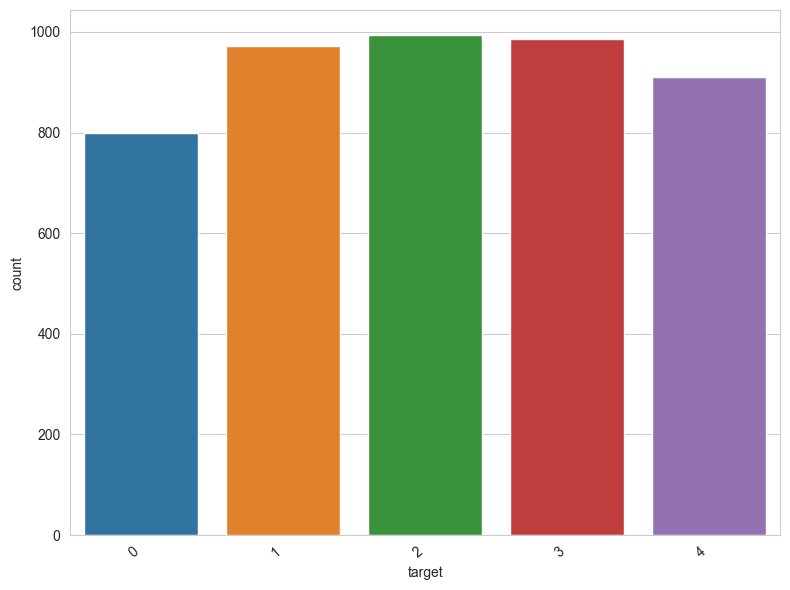

In [218]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=news)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

### preprocessing

In [219]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minhh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\minhh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [220]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))


In [221]:
def clean_text(text):
     # lowercase text
    text = text.lower() 

    # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    
    # Remove the XXXX values
    text = text.replace('x', '') 
    
    # Remove white space
    text = REMOVE_NUM.sub('', text)

    #  delete symbols which are in BAD_SYMBOLS_RE from text
    text = BAD_SYMBOLS_RE.sub('', text) 

    # delete stopwords from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    
    # removes any words composed of less than 2 or more than 21 letters
    text = ' '.join(word for word in text.split() if (len(word) >= 2 and len(word) <= 21))

    # Stemming the words
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    
    return text

In [222]:
news['text'] = news['text'].apply(clean_text)

In [223]:
news['text'].head(10)

0    eder hsvaicboeingcom dani eder subject vandal ...
1    munizbrwtmsdecnet rockwellcom rwtmsmunizb subj...
2    jfc athenamitedu john carr subject propos catc...
3    gnb leobbycomau gregori bond subject give bill...
4    organ univers illinoi chicago academ comput ce...
5    bjgood leobsuvcbsuedusubject jim lefebvr idiot...
6    schumach convecom richard schumach subject dc ...
7    wingocsparadecnet nasa wrapsorgan univers hous...
8    ez hamletucdavisedu dan herrin subject space m...
9    amj rsfatducaredu anthoni michael jivoin subje...
Name: text, dtype: object

### tf-idf

In [224]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [225]:
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_train_vc = vectorizer.fit_transform(news['text'])

In [226]:
pd.DataFrame(X_train_vc.toarray(), columns=vectorizer.get_feature_names()).head()

,__,__ __,__ jet,__ laughter,__ pasadena,__ telo,___,___ __,___ ___,___ ____,...,zoologybetween,zoologybetween svr,zoologylin,zoologylin articl,zoom,zootorontoedu,zootorontoedu henri,zootorontoedu utzoohenri,zyeh,zyeh caspianuscedu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### K-means

In [227]:
k_clusters = 10

In [228]:
from sklearn.cluster import KMeans

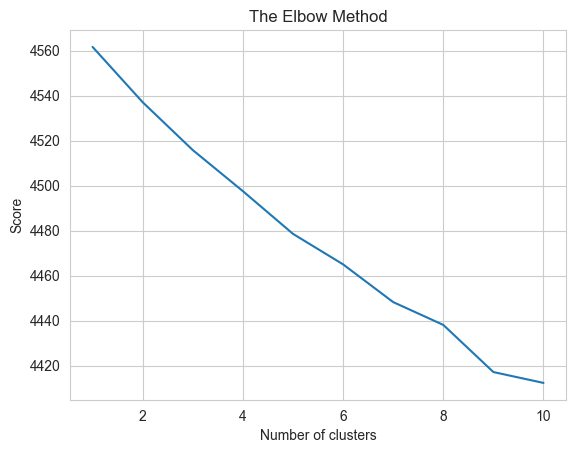

In [229]:
score = []
for i in range(1,k_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(X_train_vc)
    score.append(kmeans.inertia_)
plt.plot(range(1,k_clusters + 1 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

In [230]:
# dua vao do thi, chon k = 5

In [231]:
k_clusters = 5

In [232]:
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(X_train_vc)

KMeans(max_iter=600, n_clusters=5, random_state=0, tol=1e-06)

In [233]:
clusters = model.predict(X_train_vc)

In [234]:
news["ClusterName"] = clusters

In [235]:
news.head(10)

,text,target,target_name,ClusterName
0,eder hsvaicboeingcom dani eder subject vandal ...,3,sci.space,0
1,munizbrwtmsdecnet rockwellcom rwtmsmunizb subj...,3,sci.space,0
2,jfc athenamitedu john carr subject propos catc...,2,rec.sport.baseball,2
3,gnb leobbycomau gregori bond subject give bill...,3,sci.space,0
4,organ univers illinoi chicago academ comput ce...,4,talk.politics.guns,4
5,bjgood leobsuvcbsuedusubject jim lefebvr idiot...,2,rec.sport.baseball,2
6,schumach convecom richard schumach subject dc ...,3,sci.space,0
7,wingocsparadecnet nasa wrapsorgan univers hous...,3,sci.space,0
8,ez hamletucdavisedu dan herrin subject space m...,3,sci.space,0
9,amj rsfatducaredu anthoni michael jivoin subje...,2,rec.sport.baseball,2


In [236]:
# nhan xet: dua tren ket qua so bo, nhan thay phan cum tuong doi hop ly

### keywords tung cum

In [237]:
from sklearn.decomposition import PCA

In [238]:
# plot

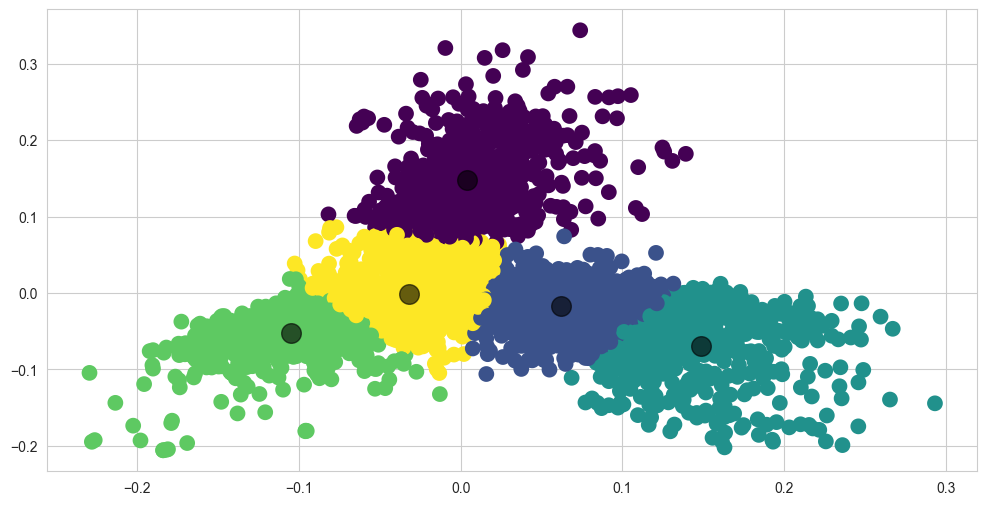

In [239]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_train_vc.toarray())
kmeans = KMeans(n_clusters=k_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.figure(figsize=(12, 6))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=40, cmap='viridis', linewidths=5)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6);

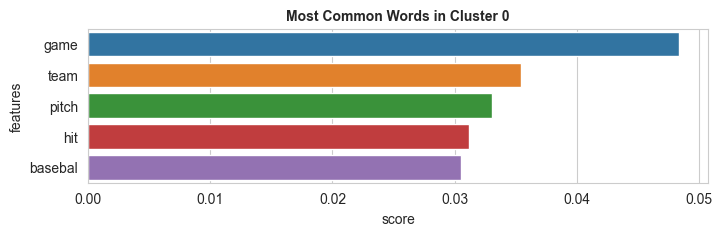

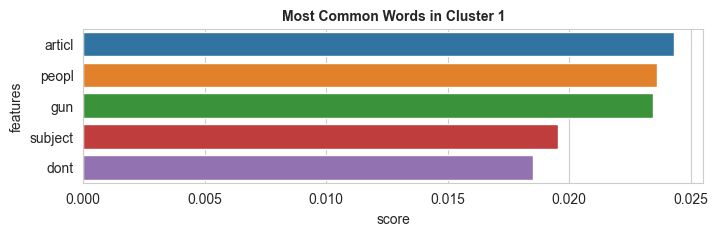

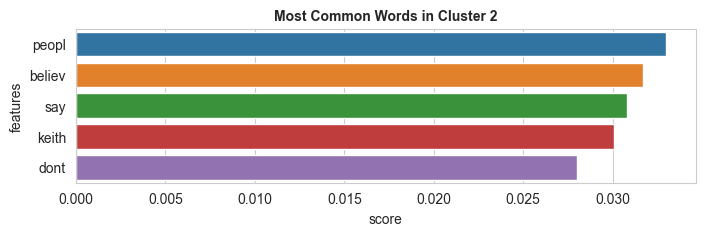

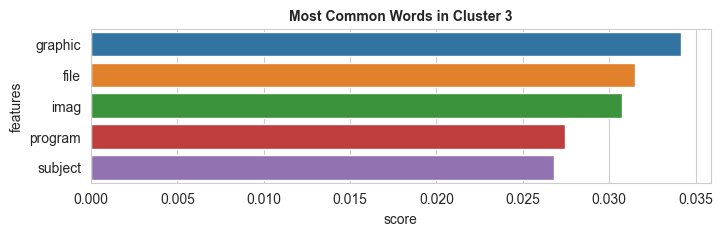

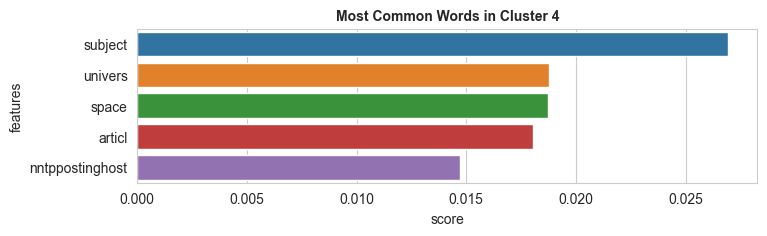

In [240]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs


def plotWords(dfs, n_feats):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(8, 2))
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])

dfs = get_top_features_cluster(X_train_vc.toarray(), prediction, 5)
plotWords(dfs, 13)

In [246]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

WordCloud for Cluster 0:


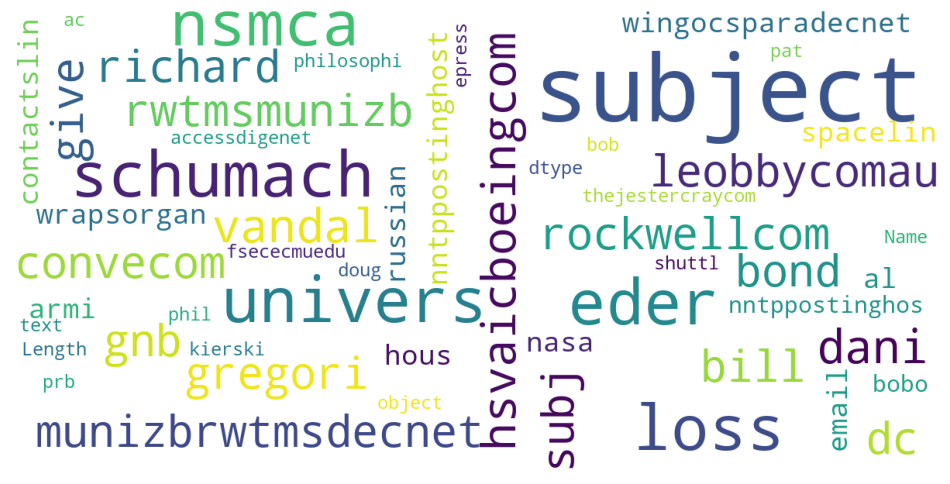

WordCloud for Cluster 1:


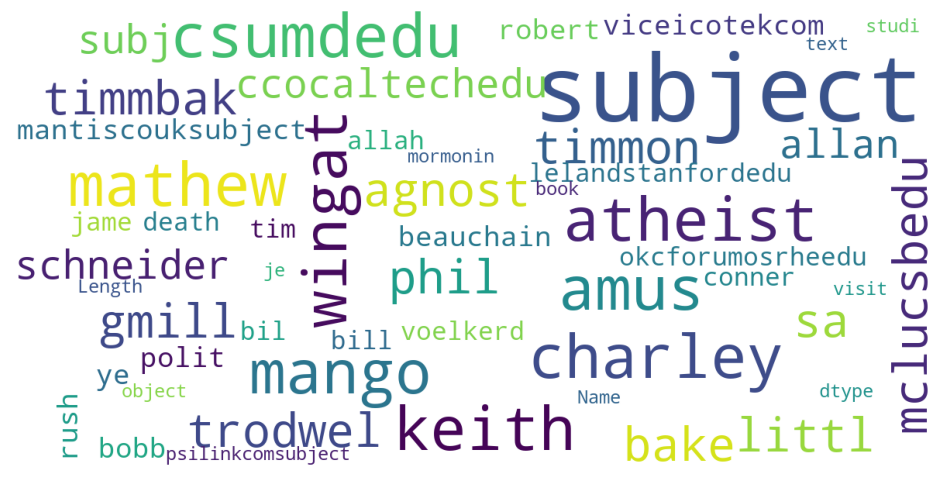

WordCloud for Cluster 2:


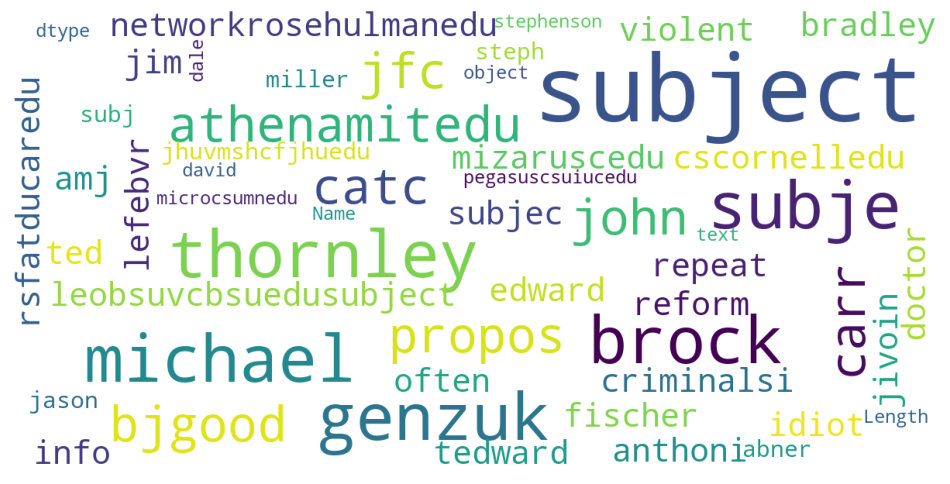

WordCloud for Cluster 3:


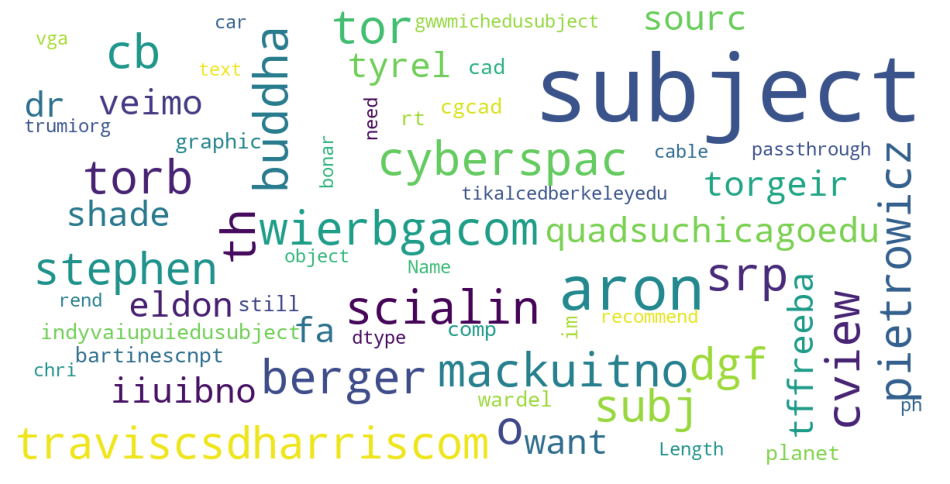

WordCloud for Cluster 4:


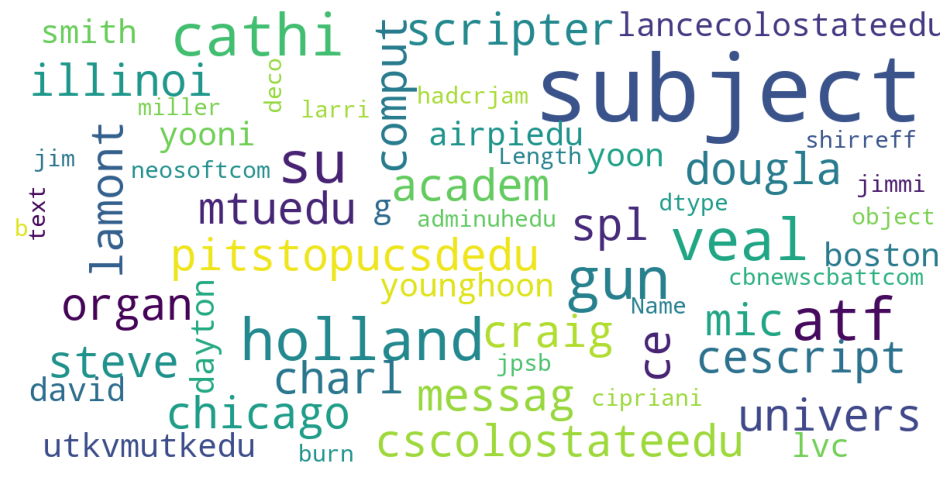

In [255]:
for i in range(0,5):
    print('WordCloud for Cluster {}:'.format(i))
    show_wordcloud(news['text'][news['ClusterName'] == i])

### kiem chung lai voi target

WordCloud for target 0:


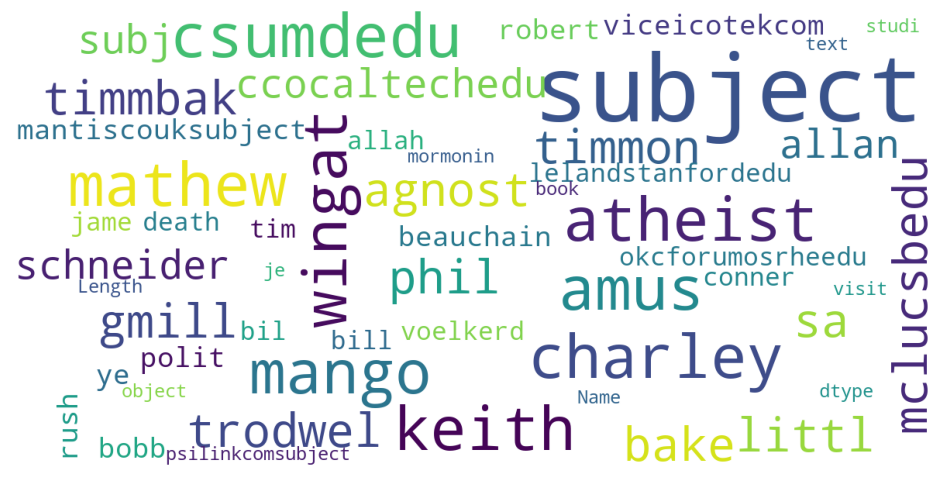

WordCloud for target 1:


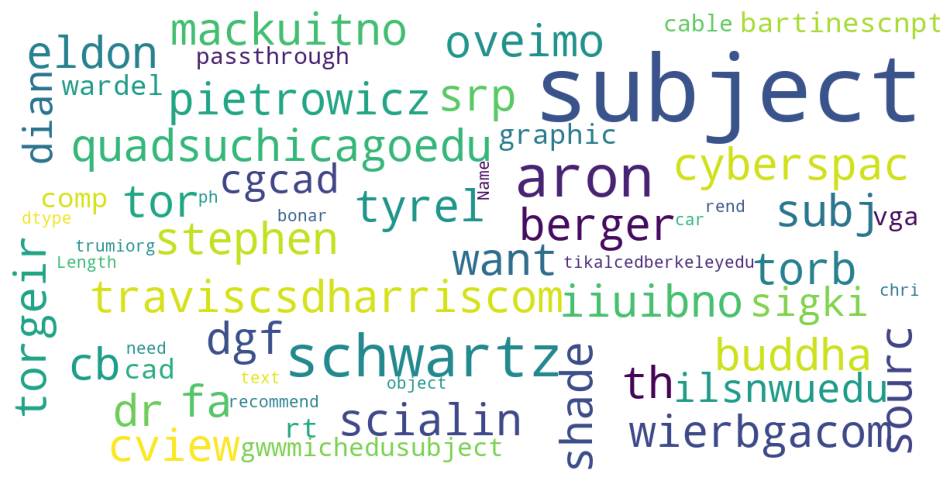

WordCloud for target 2:


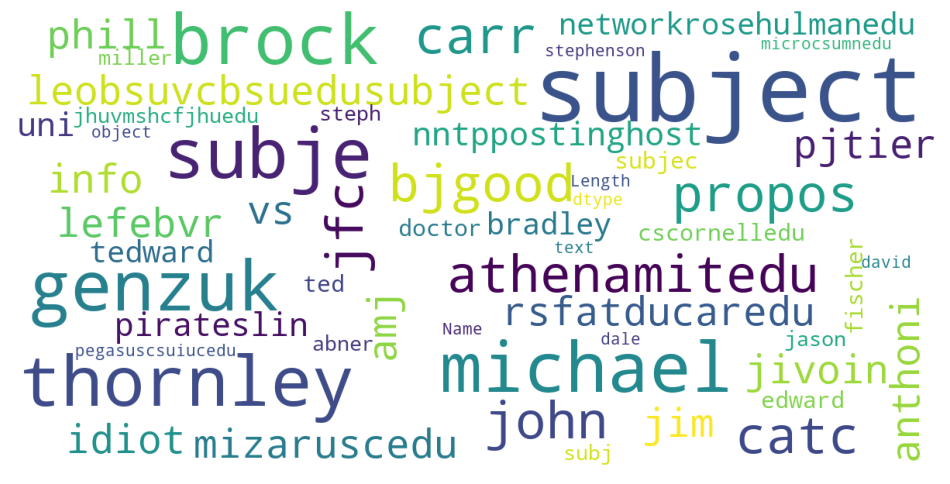

WordCloud for target 3:


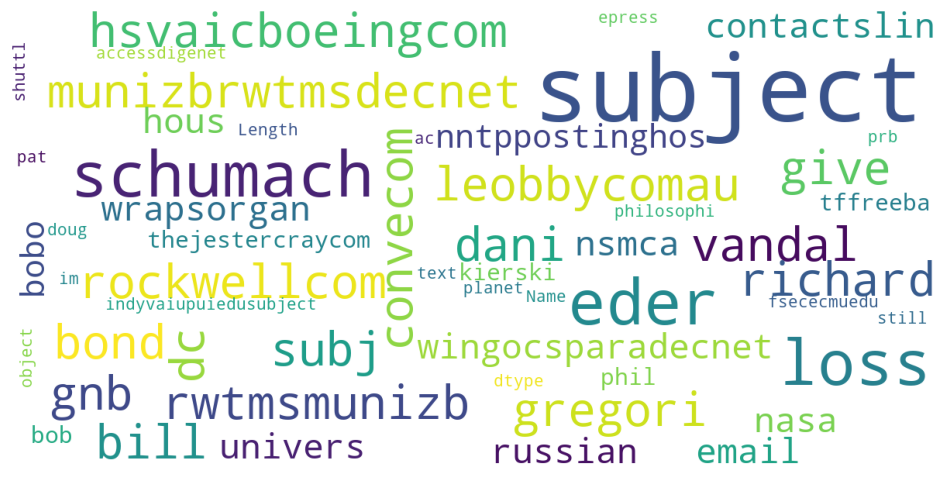

WordCloud for target 4:


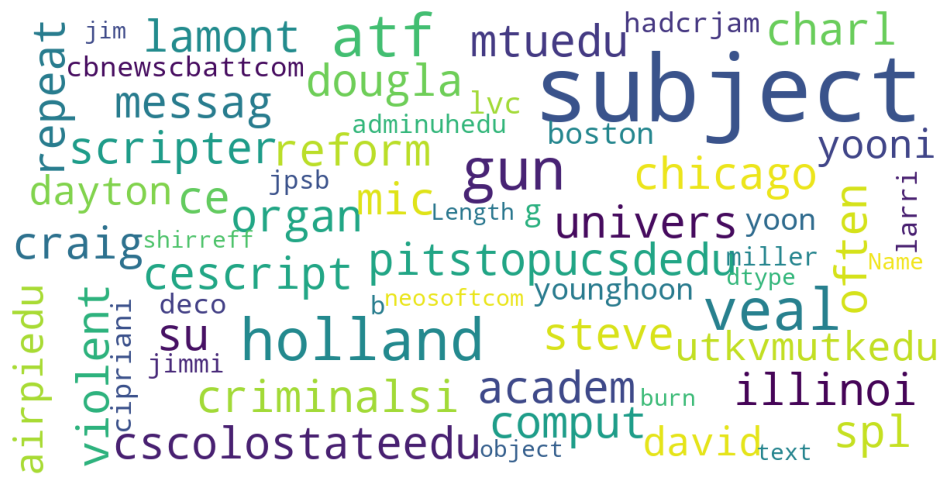

In [257]:
for i in range(0,5):
    print('WordCloud for target {}:'.format(i))
    show_wordcloud(news['text'][news['target'] == i])

### ket luan: ket qua tuong doi chinh xac